In [376]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib
import music21 as mu
import pymongo
from pymongo import MongoClient
from bs4 import BeautifulSoup
import re

Populating the interactive namespace from numpy and matplotlib


In [377]:
xmlData = BeautifulSoup(open('FinalDataSet/XMLFiles/JazzSolos/KJAllTheThingsYouAre1983_2143_290.xml'))

In [378]:
#notesDataFrame = pd.DataFrame
#notes = xmlData.find_all('note')
#print xmlData

In [379]:
allNotes = xmlData.findAll('note')

In [380]:
#allNotes

In [381]:
listOfNoteEvents = []
for note in allNotes:
    #print note.pitch
    #print note.instrument.attrs.values()
    #print 'end'
    #print note.tie
    dictForNoteEvent = {}
    dictForNoteEvent['restFlag'] = note.rest
    dictForNoteEvent['noteName'] = note.step
    dictForNoteEvent['octave'] = note.octave
    dictForNoteEvent['duration'] = note.duration.text
    dictForNoteEvent['instrument'] = note.instrument.attrs.values()
    dictForNoteEvent['accidental'] = note.alter
    dictForNoteEvent['tieFlag'] = str(note.tie)
    
    listOfNoteEvents.append(dictForNoteEvent)



In [382]:
df = pd.DataFrame(listOfNoteEvents)

In [383]:
df.head(100)

,accidental,duration,instrument,noteName,octave,restFlag,tieFlag
0,None,256,[P1-I1],None,None,<rest></rest>,None
1,<alter>-1</alter>,256,[P1-I1],<step>B</step>,<octave>4</octave>,None,None
2,<alter>-1</alter>,512,[P1-I1],<step>A</step>,<octave>4</octave>,None,None
3,None,384,[P1-I1],<step>C</step>,<octave>5</octave>,None,None
4,None,128,[P1-I1],<step>G</step>,<octave>4</octave>,None,None
5,None,256,[P1-I1],<step>F</step>,<octave>4</octave>,None,None
6,None,256,[P1-I1],<step>E</step>,<octave>4</octave>,None,None
7,None,128,[P1-I1],None,None,<rest></rest>,None
8,None,128,[P1-I1],<step>F</step>,<octave>4</octave>,None,"<tie type=""start""></tie>"
9,None,128,[P1-I1],<step>F</step>,<octave>4</octave>,None,"<tie type=""stop""></tie>"


In [384]:
# first clean of data
def cleanAccidental(data_row):
    accidentalString = str(data_row['accidental'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['accidental'] = df.apply(cleanAccidental, axis=1) 

def cleanNoteName(data_row):
    accidentalString = str(data_row['noteName'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['noteName'] = df.apply(cleanNoteName, axis=1) 

def cleanOctave(data_row):
    accidentalString = str(data_row['octave'])
    test = re.sub('<[^>]*>', '', accidentalString)
    return str(test) 
    
df['octave'] = df.apply(cleanOctave, axis=1) 


        
def cleanRest(data_row):
    restVal = -1
    restAsString = str(data_row['restFlag'])
    if restAsString != 'None':
        restVal ='rest'
    else:
        restVal = 'note'

    return str(restVal)
    
df['restFlag'] = df.apply(cleanRest, axis=1)



In [385]:
df['restFlag'].value_counts()

note    2143
rest     260
dtype: int64

In [386]:
#second clean for parts and duration
def cleanPart(data_row):
    accidentalString = str(data_row['instrument'])
    test = accidentalString[3:5]
    return str(test) 

df['part'] = df.apply(cleanPart, axis=1)

def convertDurationAsPerQuarterNoteIsOneBeat(data_row):
    asFloat = float(data_row['duration'])
    return asFloat / 256

df['quarterNoteDuration'] = df.apply(convertDurationAsPerQuarterNoteIsOneBeat, axis=1)

In [387]:
df.head()

,accidental,duration,instrument,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration
0,None,256,[P1-I1],None,None,rest,None,P1,1.0
1,-1,256,[P1-I1],B,4,note,None,P1,1.0
2,-1,512,[P1-I1],A,4,note,None,P1,2.0
3,None,384,[P1-I1],C,5,note,None,P1,1.5
4,None,128,[P1-I1],G,4,note,None,P1,0.5


In [388]:
# divide parts to ascertain location
partOne = df[df['part'] == 'P1']
partTwo = df[df['part'] == 'P2']

In [389]:
partOne['noteEventLocation'] = partOne['quarterNoteDuration'].cumsum()
partTwo['noteEventLocation'] = partTwo['quarterNoteDuration'].cumsum()

partOne['noteEventStartingLocation'] = partOne['noteEventLocation'].shift()
partTwo['noteEventStartingLocation'] = partTwo['noteEventLocation'].shift()


In [390]:
df = pd.concat([partOne, partTwo], axis=0)

In [391]:
df.head(3)

,accidental,duration,instrument,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventLocation,noteEventStartingLocation
0,None,256,[P1-I1],None,None,rest,None,P1,1,1,NaN
1,-1,256,[P1-I1],B,4,note,None,P1,1,2,1
2,-1,512,[P1-I1],A,4,note,None,P1,2,4,2


In [392]:
#df = df.sort('noteEventLocation')
#df = df.reset_index()

In [393]:
df.head(10)

,accidental,duration,instrument,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventLocation,noteEventStartingLocation
0,None,256,[P1-I1],None,None,rest,None,P1,1.0,1.0,NaN
1,-1,256,[P1-I1],B,4,note,None,P1,1.0,2.0,1.0
2,-1,512,[P1-I1],A,4,note,None,P1,2.0,4.0,2.0
3,None,384,[P1-I1],C,5,note,None,P1,1.5,5.5,4.0
4,None,128,[P1-I1],G,4,note,None,P1,0.5,6.0,5.5
5,None,256,[P1-I1],F,4,note,None,P1,1.0,7.0,6.0
6,None,256,[P1-I1],E,4,note,None,P1,1.0,8.0,7.0
7,None,128,[P1-I1],None,None,rest,None,P1,0.5,8.5,8.0
8,None,128,[P1-I1],F,4,note,"<tie type=""start""></tie>",P1,0.5,9.0,8.5
9,None,128,[P1-I1],F,4,note,"<tie type=""stop""></tie>",P1,0.5,9.5,9.0


In [394]:
#del df['index']
del df['duration']
del df['instrument']
del df['noteEventLocation']

In [395]:
df.head()

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation
0,None,None,None,rest,None,P1,1.0,NaN
1,-1,B,4,note,None,P1,1.0,1.0
2,-1,A,4,note,None,P1,2.0,2.0
3,None,C,5,note,None,P1,1.5,4.0
4,None,G,4,note,None,P1,0.5,5.5


In [396]:
#create midi frequency value
offsetForC = 0
offsetForD = 2
offsetForE = 4
offsetForF = 5
offsetForG = 7
offsetForA = 9
offsetForB = 11

def midiNumberAssign(data_row):
    
    def adjustForAccidental(accidentalVal):
        if accidentalVal == 'None':
            return 0
        else:
            return int(accidentalVal)

    if data_row['octave'] != "None":
        baseVal = int(data_row['octave']) * 12
        if data_row['noteName'] == 'C':
            return baseVal + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'D':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'E':
            return baseVal + offsetForE + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'F':
            return baseVal + offsetForF + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'G':
            return baseVal + offsetForA + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'A':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        elif data_row['noteName'] == 'B':
            return baseVal + offsetForD + adjustForAccidental(data_row['accidental'])
        



df['midiNumber'] = df.apply(midiNumberAssign, axis=1)

In [397]:
df.dtypes

accidental                    object
noteName                      object
octave                        object
restFlag                      object
tieFlag                       object
part                          object
quarterNoteDuration          float64
noteEventStartingLocation    float64
midiNumber                   float64
dtype: object

In [398]:
df[5:15]

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation,midiNumber
5,None,F,4,note,None,P1,1.0,6.0,53
6,None,E,4,note,None,P1,1.0,7.0,52
7,None,None,None,rest,None,P1,0.5,8.0,NaN
8,None,F,4,note,"<tie type=""start""></tie>",P1,0.5,8.5,53
9,None,F,4,note,"<tie type=""stop""></tie>",P1,0.5,9.0,53
10,None,G,4,note,"<tie type=""start""></tie>",P1,0.5,9.5,57
11,None,G,4,note,"<tie type=""stop""></tie>",P1,0.5,10.0,57
12,-1,A,4,note,"<tie type=""start""></tie>",P1,0.5,10.5,49
13,-1,A,4,note,"<tie type=""stop""></tie>",P1,1.0,11.0,49
14,None,None,None,rest,None,P1,1.0,12.0,NaN


In [399]:
def fixTiedNotes(data_row):
    tieFlagString = str(data_row['tieFlag'])
    durationToAdd = -1
    if tieFlagString == '<tie type="stop"></tie>':
        durationToAdd = data_row['quarterNoteDuration']
    else:
        durationToAdd = 0

    return durationToAdd
df['valueToAddToTiedNote'] = df.apply(fixTiedNotes, axis=1)

In [400]:
df.head(20)

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation,midiNumber,valueToAddToTiedNote
0,None,None,None,rest,None,P1,1.0,NaN,NaN,0.0
1,-1,B,4,note,None,P1,1.0,1.0,49,0.0
2,-1,A,4,note,None,P1,2.0,2.0,49,0.0
3,None,C,5,note,None,P1,1.5,4.0,60,0.0
4,None,G,4,note,None,P1,0.5,5.5,57,0.0
5,None,F,4,note,None,P1,1.0,6.0,53,0.0
6,None,E,4,note,None,P1,1.0,7.0,52,0.0
7,None,None,None,rest,None,P1,0.5,8.0,NaN,0.0
8,None,F,4,note,"<tie type=""start""></tie>",P1,0.5,8.5,53,0.0
9,None,F,4,note,"<tie type=""stop""></tie>",P1,0.5,9.0,53,0.5


In [401]:
df['moveTieForFix'] = df['valueToAddToTiedNote'].shift(-1)

In [402]:
df = df[df.tieFlag != '<tie type="stop"></tie>']

In [403]:
df.head()

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation,midiNumber,valueToAddToTiedNote,moveTieForFix
0,None,None,None,rest,None,P1,1.0,NaN,NaN,0,0
1,-1,B,4,note,None,P1,1.0,1.0,49,0,0
2,-1,A,4,note,None,P1,2.0,2.0,49,0,0
3,None,C,5,note,None,P1,1.5,4.0,60,0,0
4,None,G,4,note,None,P1,0.5,5.5,57,0,0


In [404]:
df['updatedQuarterNoteDuration'] = df['quarterNoteDuration'] + df['moveTieForFix']

In [405]:
df.head()

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation,midiNumber,valueToAddToTiedNote,moveTieForFix,updatedQuarterNoteDuration
0,None,None,None,rest,None,P1,1.0,NaN,NaN,0,0,1.0
1,-1,B,4,note,None,P1,1.0,1.0,49,0,0,1.0
2,-1,A,4,note,None,P1,2.0,2.0,49,0,0,2.0
3,None,C,5,note,None,P1,1.5,4.0,60,0,0,1.5
4,None,G,4,note,None,P1,0.5,5.5,57,0,0,0.5


In [406]:
df.head()

,accidental,noteName,octave,restFlag,tieFlag,part,quarterNoteDuration,noteEventStartingLocation,midiNumber,valueToAddToTiedNote,moveTieForFix,updatedQuarterNoteDuration
0,None,None,None,rest,None,P1,1.0,NaN,NaN,0,0,1.0
1,-1,B,4,note,None,P1,1.0,1.0,49,0,0,1.0
2,-1,A,4,note,None,P1,2.0,2.0,49,0,0,2.0
3,None,C,5,note,None,P1,1.5,4.0,60,0,0,1.5
4,None,G,4,note,None,P1,0.5,5.5,57,0,0,0.5


In [407]:
df['part'].value_counts()

P1    2030
P2     345
dtype: int64

In [408]:
#get rid of unused columns
del df['tieFlag']
del df['valueToAddToTiedNote']
del df['moveTieForFix']
del df['accidental']
del df['noteName']
del df['octave']
del df['quarterNoteDuration']

In [409]:
df['noteEventStartingLocation'].fillna(0.0, inplace=True)

In [410]:
#df['midiNumber'].fillna(-1, inplace=True)

In [411]:
df.head()

,restFlag,part,noteEventStartingLocation,midiNumber,updatedQuarterNoteDuration
0,rest,P1,0.0,NaN,1.0
1,note,P1,1.0,49,1.0
2,note,P1,2.0,49,2.0
3,note,P1,4.0,60,1.5
4,note,P1,5.5,57,0.5


In [412]:
df['quarterNoteDuration'] = df['updatedQuarterNoteDuration']
del df['updatedQuarterNoteDuration']

In [413]:
df.head(100)

,restFlag,part,noteEventStartingLocation,midiNumber,quarterNoteDuration
0,rest,P1,0.00,NaN,1.00
1,note,P1,1.00,49,1.00
2,note,P1,2.00,49,2.00
3,note,P1,4.00,60,1.50
4,note,P1,5.50,57,0.50
5,note,P1,6.00,53,1.00
6,note,P1,7.00,52,1.00
7,rest,P1,8.00,NaN,0.50
8,note,P1,8.50,53,1.00
10,note,P1,9.50,57,1.00


In [435]:
df['nextNoteFreqDistance'] = df['midiNumber'].shift(-1)
df['nextNoteFreqDistance'] = df['nextNoteFreqDistance'] - df['midiNumber']

In [436]:
df.head()

,restFlag,part,noteEventStartingLocation,midiNumber,quarterNoteDuration,nextNoteFreqDistance
0,rest,P1,0.0,NaN,1.0,NaN
1,note,P1,1.0,49,1.0,0
2,note,P1,2.0,49,2.0,11
3,note,P1,4.0,60,1.5,-3
4,note,P1,5.5,57,0.5,-4


In [437]:
df

,restFlag,part,noteEventStartingLocation,midiNumber,quarterNoteDuration,nextNoteFreqDistance
0,rest,P1,0.0,NaN,1.0,NaN
1,note,P1,1.0,49,1.0,0
2,note,P1,2.0,49,2.0,11
3,note,P1,4.0,60,1.5,-3
4,note,P1,5.5,57,0.5,-4
5,note,P1,6.0,53,1.0,-1
6,note,P1,7.0,52,1.0,NaN
7,rest,P1,8.0,NaN,0.5,NaN
8,note,P1,8.5,53,1.0,4
10,note,P1,9.5,57,1.0,-8


In [417]:
df[800:900]

,restFlag,part,noteEventStartingLocation,midiNumber,quarterNoteDuration,nextNoteFreqDistance
815,note,P1,477.000000,63,0.332031,None
816,note,P1,477.332031,60,0.332031,None
817,note,P1,477.664062,49,0.335938,None
818,note,P1,478.000000,51,0.332031,None
819,note,P1,478.332031,37,0.332031,None
820,note,P1,478.664062,49,0.335938,None
821,note,P1,479.000000,63,0.332031,None
822,note,P1,479.332031,60,0.332031,None
823,rest,P1,479.664062,NaN,0.335938,None
824,note,P1,480.000000,57,0.332031,None


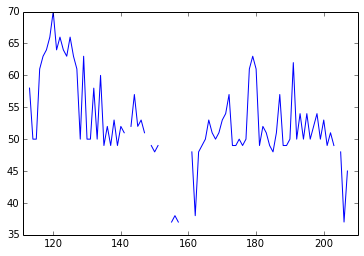

In [419]:
df[df['part'] == 'P1']['midiNumber'][100:200].plot()

In [420]:
#find sequences and ngrams

In [421]:
partOneAsMatrix = df[df['part'] == 'P1']
matrix = partOneAsMatrix[['part','quarterNoteDuration','noteEventStartingLocation', 'midiNumber']].as_matrix()

In [422]:
matrix[0:10]

array([['P1', 1.0, 0.0, nan],
       ['P1', 1.0, 1.0, 49.0],
       ['P1', 2.0, 2.0, 49.0],
       ['P1', 1.5, 4.0, 60.0],
       ['P1', 0.5, 5.5, 57.0],
       ['P1', 1.0, 6.0, 53.0],
       ['P1', 1.0, 7.0, 52.0],
       ['P1', 0.5, 8.0, nan],
       ['P1', 1.0, 8.5, 53.0],
       ['P1', 1.0, 9.5, 57.0]], dtype=object)

In [423]:
#create 
threeNoteSequences = []
phraseLength = 3


for x in range(len(matrix)):
    noteTuple= []
    currentNote = matrix[x][3]
    #print matrix[x]
    noteTuple.append(str(currentNote))
    #secondNote = None
    #thirdNote = None
    
    try:
        secondNote = matrix[x+1][3]
        noteTuple.append(str(secondNote))
        
    except: 
        pass
    
    try:
        thirdNote = matrix[x+2][3]
        noteTuple.append(str(thirdNote))
    except: 
        pass
    
    threeNoteSequences.append(noteTuple)
    
    


#print threeNoteSequences

In [424]:
df2 = pd.DataFrame(threeNoteSequences, columns=['one', 'two', 'three'])

In [425]:
df2['next'] = (df2['one'] +  df2['two'] +  df2['three'])

In [426]:
df2

,one,two,three,next
0,nan,49.0,49.0,nan49.049.0
1,49.0,49.0,60.0,49.049.060.0
2,49.0,60.0,57.0,49.060.057.0
3,60.0,57.0,53.0,60.057.053.0
4,57.0,53.0,52.0,57.053.052.0
5,53.0,52.0,nan,53.052.0nan
6,52.0,nan,53.0,52.0nan53.0
7,nan,53.0,57.0,nan53.057.0
8,53.0,57.0,49.0,53.057.049.0
9,57.0,49.0,nan,57.049.0nan


In [429]:
df2['next'].value_counts()

nannannan       51
57.049.049.0    30
49.057.049.0    28
49.049.057.0    18
nan57.049.0     12
49.049.050.0    11
49.053.049.0    10
49.0nannan      10
50.054.050.0    10
nannan49.0      10
53.057.049.0     9
49.048.051.0     9
49.050.049.0     9
50.049.049.0     8
nannan57.0       8
50.0nannan       8
60.049.057.0     8
50.049.050.0     8
50.050.057.0     8
49.057.053.0     8
54.057.050.0     7
49.049.0nan      7
48.051.049.0     7
60.050.050.0     7
62.063.060.0     6
48.049.051.0     6
57.049.060.0     6
50.052.054.0     6
52.0nannan       6
53.049.060.0     6
                ..
50.053.064.0     1
68.050.060.0     1
53.051.038.0     1
50.057.053.0     1
38.037.0nan      1
61.049.061.0     1
nan49.063.0      1
53.057.0nan      1
nan52.054.0      1
58.038.052.0     1
65.066.062.0     1
52.054.0nan      1
63.062.057.0     1
49.063.050.0     1
61.0nan57.0      1
37.0nan57.0      1
57.050.049.0     1
63.050.054.0     1
70.064.065.0     1
54.052.0nan      1
65.062.049.0     1
62.050.064.0

In [428]:
#df2['merged'] = str(df2[1]) + ',' + str(df2[2])

In [ ]:
#df2['merged'].value_counts()